In [1]:
#We will work on a small subset of MNIST dataset which contains only two digits (3 and 7):
!pip install -Uqq fastbook
import fastbook
# fastbook.setup_book() # mount GDrive
from fastbook import *
from matplotlib import pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.5 MB/s eta 0:00:00


In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
path

Path('/root/.fastai/data/mnist_sample')

In [3]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid')]

In [4]:
Path.BASE_PATH = path

In [5]:
(path).ls()

(#3) [Path('train'),Path('labels.csv'),Path('valid')]

In [6]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()

In [7]:
sevens
im7_path = sevens[54]
im7 = Image.open(im7_path)
im7

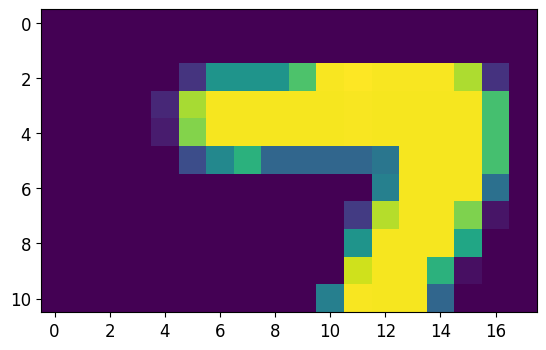

In [8]:
# --- We can convert PILImageFile to a numpy array or a tensor (on GPU):
# im7_array = array(im7)
# plt.imshow(im7_array)
im7_tensor = tensor(im7)
plt.imshow(im7_tensor[4:15, 4:22])

In [9]:
# --- We can also use pandas DF to vizualize them in a neat way:
df = pd.DataFrame(im7_tensor[4:15, 4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('BuPu')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,38,132,132,132,184,253,255,253,253,253,224,37,0
3,0,0,0,0,28,222,252,252,252,252,252,253,252,252,252,252,180,0
4,0,0,0,0,19,208,252,252,252,252,252,253,252,252,252,252,180,0
5,0,0,0,0,0,60,119,163,84,84,84,84,100,252,252,252,180,0
6,0,0,0,0,0,0,0,0,0,0,0,0,111,252,252,252,94,0
7,0,0,0,0,0,0,0,0,0,0,0,44,227,252,252,206,14,0
8,0,0,0,0,0,0,0,0,0,0,0,132,252,252,252,151,0,0
9,0,0,0,0,0,0,0,0,0,0,0,237,252,252,164,10,0,0


In [10]:
#We will start by making a simple baseline predictive model (pixel similarity):
three_tensors = [tensor(Image.open(f)) for f in threes]
seven_tensors = [tensor(Image.open(f)) for f in sevens]

<Axes: >

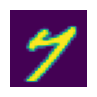

In [11]:
len(seven_tensors)
seven_tensors[1].shape
show_image(seven_tensors[1])

In [12]:
#Let's stack our images into a two tensors and normalize them:
stacked_threes = torch.stack(three_tensors).float() / 255
stacked_sevens = torch.stack(seven_tensors).float() / 255

In [13]:
print(stacked_threes.shape)
a_3 = stacked_threes[34]
a_7 = stacked_sevens[54]
a_3.shape

torch.Size([6131, 28, 28])


torch.Size([28, 28])

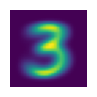

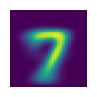

In [14]:
#For this simple model, we will compare new images against the means of 3 and 7 tensors:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

show_image(mean3), show_image(mean7);

In [15]:
 def img_distance(a, b):
     return (a - b).abs().mean()

print(img_distance(a_7, mean7))
print(img_distance(a_7, mean3))

tensor(0.1084)
tensor(0.1410)


In [16]:
#Let's create a validation set and a simple MAE fucntion:

# Stack tensors:
valid_3_tensors = torch.stack([tensor(Image.open(f)) for f in (path/'valid/3').ls()])
valid_7_tensors = torch.stack([tensor(Image.open(f)) for f in (path/'valid/7').ls()])

# Normalize tensors:
valid_3_tensors = valid_3_tensors.float()/255
valid_7_tensors = valid_7_tensors.float()/255

print(valid_3_tensors.shape)

torch.Size([1010, 28, 28])


In [19]:
def img_distance(input, mean_tensor):
    return (input-mean_tensor).abs().mean((-1,-2))

def is_3(x):
    return (img_distance(x, mean3) < img_distance(x, mean7)).float()

In [20]:
is_3(valid_3_tensors).shape

torch.Size([1010])

In [21]:
accuracy_3s = is_3(valid_3_tensors).mean()
accuracy_7s = (1 - is_3(valid_7_tensors)).mean()

print(accuracy_3s)

tensor(0.9168)
